<a href="https://colab.research.google.com/github/FekadeTafess/Health-Data-Analysis-Healthy-Minds-Survey-Data-/blob/main/HMS_Survey_Structuring_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Figure generated. Depression count: 25133, Anxiety count: 22999


/tmp/ipython-input-3149441957.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=prevalence_pct.index, y=prevalence_pct.values, palette='coolwarm')


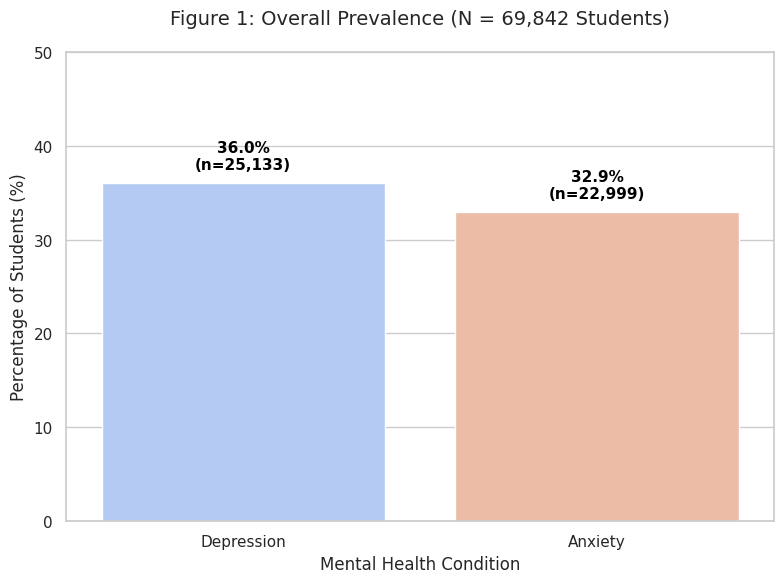

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

df = pd.read_csv('final_research_dataset.csv')

prevalence_pct = df[['dep_any', 'anx_any']].mean() * 100
counts = df[['dep_any', 'anx_any']].sum()
total_n = len(df)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
bars = sns.barplot(x=prevalence_pct.index, y=prevalence_pct.values, palette='coolwarm')

plt.title(f'Figure 1: Overall Prevalence (N = {total_n:,} Students)', fontsize=14, pad=20)
plt.ylabel('Percentage of Students (%)', fontsize=12)
plt.xlabel('Mental Health Condition', fontsize=12)
plt.xticks([0, 1], ['Depression', 'Anxiety'])
plt.ylim(0, 50)

for i, (pct, count) in enumerate(zip(prevalence_pct.values, counts.values)):
    plt.text(i, pct + 1.5, f"{pct:.1f}%\n(n={int(count):,})",
             ha='center', fontsize=11, fontweight='bold', color='black')

plt.tight_layout()
plt.savefig('prevalence_with_counts.png')

print(f"Figure generated. Depression count: {int(counts['dep_any'])}, Anxiety count: {int(counts['anx_any'])}")

/tmp/ipython-input-3591216482.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=food_risk.index, y=food_risk.values, ax=ax1, palette='Reds')
/tmp/ipython-input-3591216482.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=house_risk.index, y=house_risk.values, ax=ax2, palette='Oranges')


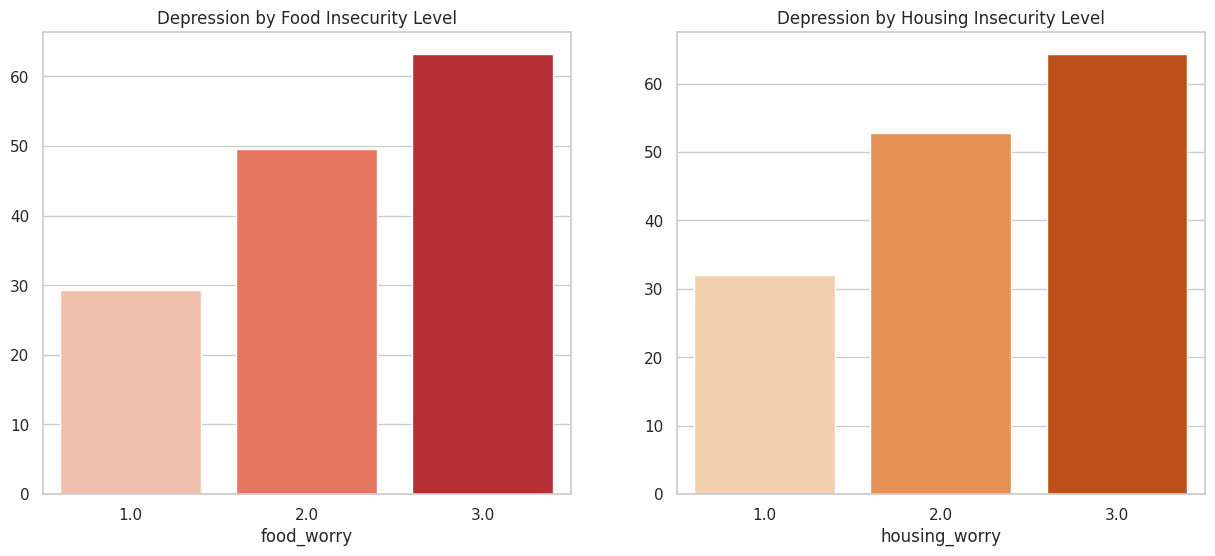

In [3]:
# --- Figure 2: The Risk Gradient (Food & Housing) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
food_risk = clean_df.groupby('food_worry')['dep_any'].mean() * 100
sns.barplot(x=food_risk.index, y=food_risk.values, ax=ax1, palette='Reds')
ax1.set_title('Depression by Food Insecurity Level')
house_risk = clean_df.groupby('housing_worry')['dep_any'].mean() * 100
sns.barplot(x=house_risk.index, y=house_risk.values, ax=ax2, palette='Oranges')
ax2.set_title('Depression by Housing Insecurity Level')
plt.savefig('risk_gradients.png')

Optimization terminated successfully.
         Current function value: 0.597347
         Iterations 5


/tmp/ipython-input-2170337714.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Odds Ratio', y='Variable', data=odds_df, palette='magma')


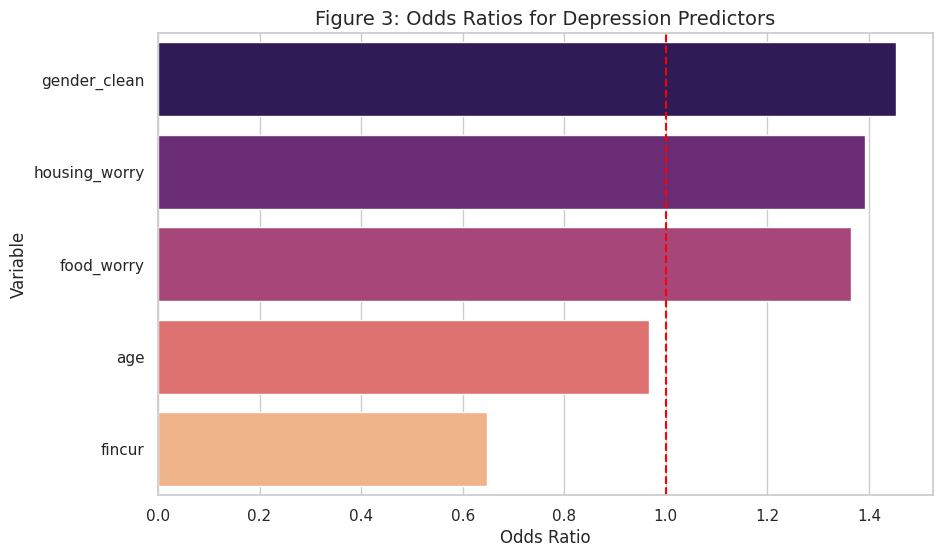

In [4]:
# --- Figure 3: Odds Ratios for Predictors ---
X = sm.add_constant(clean_df[['fincur', 'food_worry', 'housing_worry', 'age', 'gender_clean']])
model_dep = sm.Logit(clean_df['dep_any'], X).fit()
odds_ratios = np.exp(model_dep.params).drop('const')
odds_df = pd.DataFrame({'Variable': odds_ratios.index, 'Odds Ratio': odds_ratios.values}).sort_values('Odds Ratio', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Odds Ratio', y='Variable', data=odds_df, palette='magma')
plt.axvline(1, color='red', linestyle='--')
plt.title('Figure 3: Odds Ratios for Depression Predictors', fontsize=14)
plt.savefig('odds_ratio_plot.png')

/tmp/ipython-input-2361623934.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_rates.index, y=group_rates.values, order=['Neither', 'Food Only', 'Housing Only', 'Both'], palette= 'viridis')


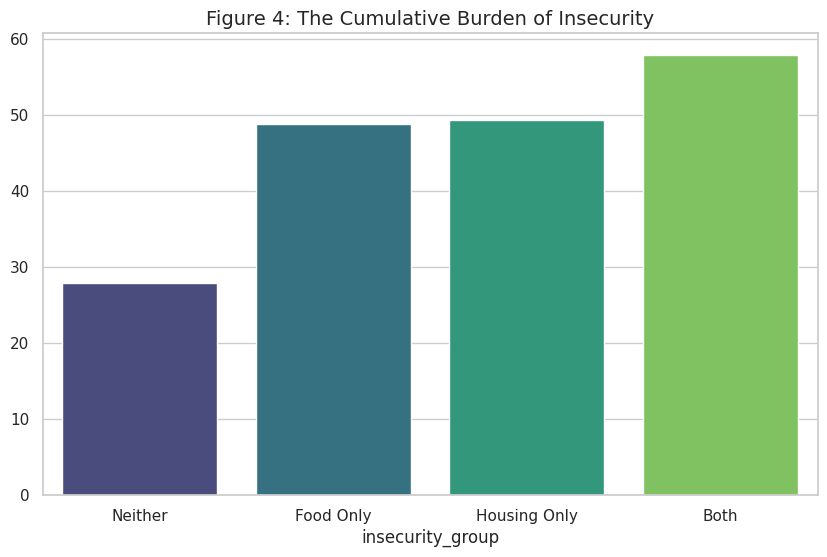

In [5]:
# Figure 4: Cumulative Impact
clean_df['high_food'] = clean_df['food_worry'] > 1
clean_df['high_house'] = clean_df['housing_worry'] > 1
def categorize(row):
    if row['high_food'] and row['high_house']: return 'Both'
    if row['high_food']: return 'Food Only'
    if row['high_house']: return 'Housing Only'
    return 'Neither'
clean_df['insecurity_group'] = clean_df.apply(categorize, axis=1)
group_rates = clean_df.groupby('insecurity_group')['dep_any'].mean() * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=group_rates.index, y=group_rates.values, order=['Neither', 'Food Only', 'Housing Only', 'Both'], palette= 'viridis')
plt.title('Figure 4: The Cumulative Burden of Insecurity', fontsize=14)
plt.savefig('cumulative_burdern.png')
